In [1]:
import os
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train=pd.read_csv('D:/APSS/Deep Learning/Kannada-MNIST/train.csv')
test=pd.read_csv('D:/APSS/Deep Learning/Kannada-MNIST/test.csv')
sample_sub=pd.read_csv('D:/APSS/Deep Learning/Kannada-MNIST/sample_submission.csv')

In [3]:
print('The Train  dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('The Test  dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The Train  dataset has 60000 rows and 785 columns
The Test  dataset has 5000 rows and 785 columns


In [4]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(3)

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test=test.drop('id', axis=1)
test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


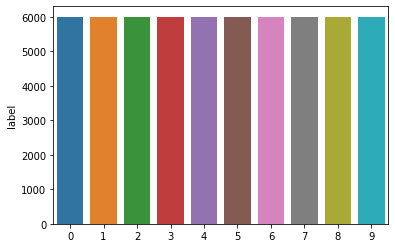

In [7]:
y=train.label.value_counts()
sns.barplot(y.index,y)

In [8]:
X_train=train.drop('label',axis=1)
Y_train=train.label

In [9]:
X_train=X_train/255
test=test/255

In [10]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [11]:
print('The shape of train set now is',X_train.shape)
print('The shape of test set now is',test.shape)

The shape of train set now is (60000, 28, 28, 1)
The shape of test set now is (5000, 28, 28, 1)


In [12]:
Y_train=to_categorical(Y_train)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=42,test_size=0.15)

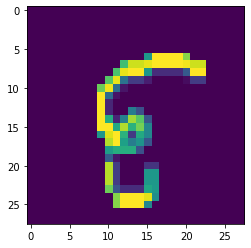

In [14]:
plt.imshow(X_train[0][:,:,0])

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)       

In [19]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [20]:
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [22]:
epochs=30   #change this to 30 if you need to get better score
batch_size=64

In [23]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 521s - loss: 0.2723 - accuracy: 0.9115 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 2/30


C:\Users\DELL\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 632s - loss: 0.0658 - accuracy: 0.9803 - val_loss: 0.0298 - val_accuracy: 0.9926
Epoch 3/30
 - 613s - loss: 0.0538 - accuracy: 0.9843 - val_loss: 0.0195 - val_accuracy: 0.9939
Epoch 4/30
 - 607s - loss: 0.0445 - accuracy: 0.9870 - val_loss: 0.0196 - val_accuracy: 0.9946
Epoch 5/30
 - 541s - loss: 0.0415 - accuracy: 0.9878 - val_loss: 0.0236 - val_accuracy: 0.9944
Epoch 6/30
 - 315s - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0244 - val_accuracy: 0.9938
Epoch 7/30
 - 280s - loss: 0.0359 - accuracy: 0.9900 - val_loss: 0.0132 - val_accuracy: 0.9959
Epoch 8/30
 - 292s - loss: 0.0304 - accuracy: 0.9911 - val_loss: 0.0192 - val_accuracy: 0.9946
Epoch 9/30
 - 289s - loss: 0.0296 - accuracy: 0.9916 - val_loss: 0.0162 - val_accuracy: 0.9949
Epoch 10/30
 - 407s - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0181 - val_accuracy: 0.9950
Epoch 11/30
 - 461s - loss: 0.0271 - accuracy: 0.9928 - val_loss: 0.0129 - val_accuracy: 0.9959
Epoch 12/30
 - 492s - loss: 0.0261 - accuracy: 0.9925 - val

In [24]:
#''''history = model.fit_generator(
#   train_generator, 
#    epochs=35,
#    validation_data=validation_generator,
#    validation_steps=12,
#    steps_per_epoch=500,
#    callbacks=callbacks
#)'''''

Text(0, 0.5, 'accuracy')

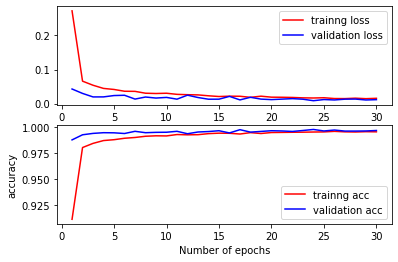

In [25]:
fig,ax=plt.subplots(2,1)
fig.set
x=range(1,1+epochs)
ax[0].plot(x,history.history['loss'],color='red')
ax[0].plot(x,history.history['val_loss'],color='blue')

ax[1].plot(x,history.history['accuracy'],color='red')
ax[1].plot(x,history.history['val_accuracy'],color='blue')
ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')


In [26]:
y_pre_test=model.predict(X_test)
y_pre_test=np.argmax(y_pre_test,axis=1)
y_test=np.argmax(y_test,axis=1)

In [27]:
conf=confusion_matrix(y_test,y_pre_test)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))

In [28]:
conf

,0,1,2,3,4,5,6,7,8,9
0,850,8,0,0,0,0,0,0,0,0
1,0,913,0,0,0,0,0,0,0,0
2,1,0,906,0,0,0,0,1,0,0
3,0,0,0,883,1,0,0,6,0,0
4,0,0,0,0,925,0,0,0,1,0
5,0,0,0,1,1,872,0,0,0,0
6,0,0,0,0,0,0,859,2,0,1
7,0,0,0,0,0,0,1,932,0,0
8,0,0,0,0,0,0,0,0,918,0
9,0,0,0,0,1,0,4,1,0,912


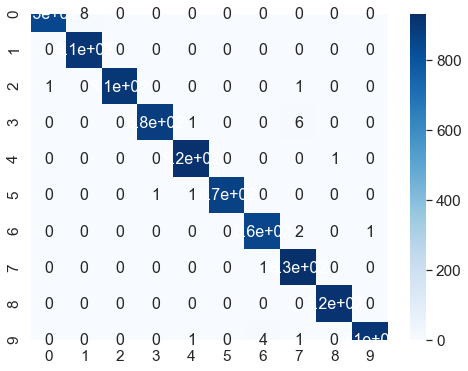

In [29]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf, annot=True,annot_kws={"size": 16},cmap=plt.cm.Blues)

In [30]:
x=(y_pre_test-y_test!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

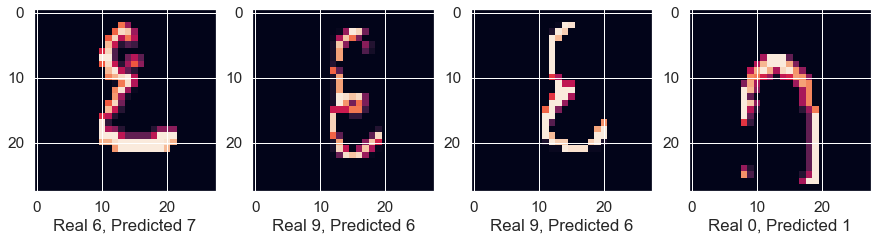

In [31]:
fig,ax=plt.subplots(1,4,sharey=False,figsize=(15,15))

for i in range(4):
    ax[i].imshow(X_test[x[i]][:,:,0])
    ax[i].set_xlabel('Real {}, Predicted {}'.format(y_test[x[i]],y_pre_test[x[i]]))

In [32]:
test=pd.read_csv('D:/APSS/Deep Learning/Kannada-MNIST/test.csv')

In [33]:
test_id=test.id

test=test.drop('id',axis=1)
test=test/255
test=test.values.reshape(-1,28,28,1)

In [34]:
test.shape

(5000, 28, 28, 1)

In [35]:
y_pre=model.predict(test)     ##making prediction
y_pre=np.argmax(y_pre,axis=1) ##changing the prediction intro labels

In [36]:
y_pre

array([3, 0, 2, ..., 1, 6, 3], dtype=int64)

In [37]:
sample_sub['label']=y_pre
sample_sub.to_csv('submission.csv',index=False)

In [38]:
sample_sub.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
